# K-Means with silhouette selection method

In [14]:
# =============================================================================
# K-Means with Silhouette method
# =============================================================================

# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Silhouette Score
from sklearn.cluster import KMeans
from sklearn import metrics

# Dataset
dataset = pd.read_csv('CC_GENERAL.csv', encoding='utf-8')
X = dataset[["BALANCE", "PURCHASES"]].values

Iteration N Clusters: k: 2
Silhouette score = 0.6456577525250198 for N Clusters 2
Difference with the previous score 0
Iteration N Clusters: k: 3
Silhouette score = 0.6282409065765152 for N Clusters 3
Difference with the previous score 0.026975353243093986
Iteration N Clusters: k: 4
Silhouette score = 0.6351719409667551 for N Clusters 4
Difference with the previous score -0.011032446817271597
Iteration N Clusters: k: 5
Silhouette score = 0.5010454813802663 for N Clusters 5
Difference with the previous score 0.2111655930240612


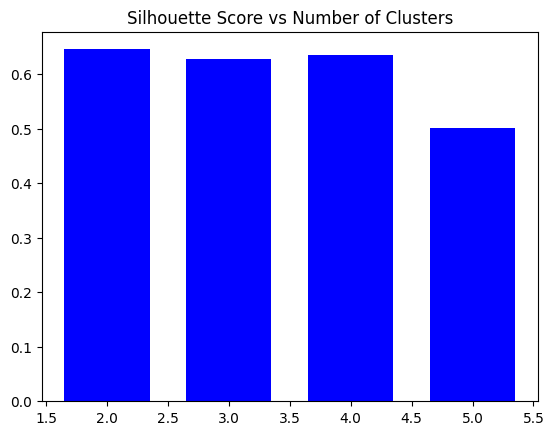

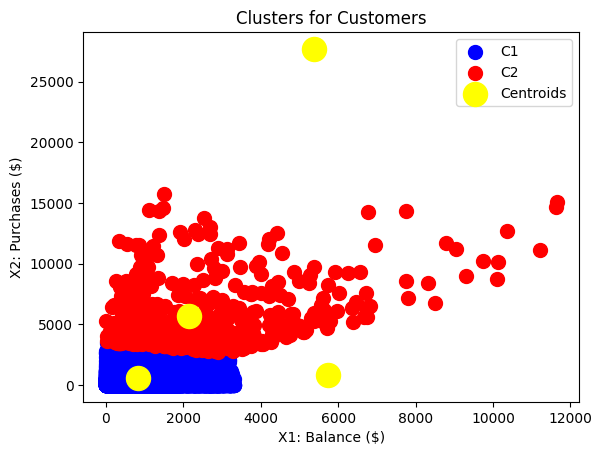

In [16]:
def silhouette_selection(reference, X, figure=False):
    """
    In this case a reference value is used to stop when the difference of using a k or another
    is very significant (since it would mean that the model has worsened a lot)

    """
    shc = [] # We put a vector to 0 to see the different scores according to the number of clusters that we define
    diff = 0
    i = 1
    values = []

    while abs(diff) < reference:
        i += 1 # EThis metric needs at least 2 clusters
        values.append(i)
        print("Iteration N Clusters: k: {k}".format(k=i))
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(X)
        score = metrics.silhouette_score(X, kmeans.labels_, metric="euclidean", sample_size=len(X))
        # First iteration
        if i == 2:
            pass
        # Remaining iterations
        else:
            diff = (shc[-1] - score)/shc[-1]
        shc.append(score)
        print("Silhouette score = {0} for N Clusters {1}".format(score, i))
        print("Difference with the previous score", diff)

    if figure:
        plt.figure()
        plt.bar(values, shc, width=0.7, color='blue', align='center')
        plt.title('Silhouette Score vs Number of Clusters')
        plt.show()

    # Final clusters
    k = i-1
    return shc, k



# Obtaining optimum K
reference = 0.15
shc, k = silhouette_selection(reference, X, figure=True)

# K-means
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

### Plot clustes (one by one)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters for Customers')
plt.xlabel('X1: Balance ($)')
plt.ylabel('X2: Purchases ($)')
plt.legend()
plt.show()